In [1]:
#https://m.blog.naver.com/PostView.naver?blogId=demian7607&logNo=222043724449&proxyReferer=

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0
2.9.2


In [2]:
# colab 구독
#https://colab.research.google.com/notebooks/pro.ipynb

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Dec 25 15:38:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    51W / 400W |    632MiB / 40536MiB |      5%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 한글깨짐 방지
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# (런타임 다시 시작)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


#정민이 만든 dataset zip파일 압축풀기  
# (주의 1번만 풀것!)  

In [ ]:
# import time
# start = time.time()

# %cd /content/drive/MyDrive/Colab Notebooks/deep_learning_pjt

# !unzip -qq "/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face_zip.zip"

# print(f"압축해제 소요시간 :{time.time()-start}")

/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt
warning [/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face_zip.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face_zip.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #93658).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
압축해제 소요시간 :619.6101295948029


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

train_dir = '/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face/train'
val_dir = '/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face/validation'
test_dir = '/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face/test'
train_dir, val_dir , test_dir

('/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face/train',
 '/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face/validation',
 '/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt/Korean_face/test')

In [6]:
from glob import glob
class_paths = glob(train_dir+'/*')
class_names = []
for class_path in class_paths:
    class_names.append(class_path.split('/')[-1])
class_names

['S001_E01',
 'S001_E02',
 'S001_E03',
 'S002_E01',
 'S002_E02',
 'S002_E03',
 'S003_E01',
 'S003_E02',
 'S003_E03',
 'S004_E01',
 'S004_E02',
 'S004_E03',
 'S005_E01',
 'S005_E02',
 'S005_E03',
 'S006_E01',
 'S006_E02',
 'S006_E03']

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1/255) 
val_datagen = ImageDataGenerator(rescale=1/255) 
test_datagen = ImageDataGenerator(rescale=1/255) 

train_generator = train_datagen.flow_from_directory(train_dir,  # target directory
                                                    classes=class_names, # cats, dogs directory 순서로 label 0,1을 설정
                                                    target_size=(100,100),
                                                    batch_size= 32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir,  # target directory
                                                    classes=class_names, # cats, dogs directory 순서로 label 0,1을 설정
                                                    target_size=(100,100),
                                                    batch_size= 32,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,  # target directory
                                                    classes=class_names, # cats, dogs directory 순서로 label 0,1을 설정
                                                    target_size=(100,100),
                                                    batch_size= 32,
                                                    class_mode='categorical')

Found 52028 images belonging to 18 classes.
Found 0 images belonging to 18 classes.
Found 18720 images belonging to 18 classes.


# korean_face_classification_generator.ipynb  

https://nanunzoey.tistory.com/entry/%EA%B3%BC%EC%A0%81%ED%95%A9Overfitting%EA%B3%BC-%EA%B7%9C%EC%A0%9CRegularization   
https://nicola-ml.tistory.com/137  
 

학습할때는 acc = 0.98이였지만  
검증할때는 acc = 0.82였다.  

train에 비해 test 성능이 낮기 때문에 과적합이 발생하였다.   
=> 배치정규화 이미 적용함  
=> 규제의 필요성  
=> 가중치감소(Weight Decay),L1,L2,드롭아웃(dropout)  

* 현재 l2(0.001) 규제 추가함  



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Activation,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
# from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

import time

start = time.time()

with tf.device('/device:GPU:0'):
  model = Sequential([
      Conv2D(filters=32,kernel_size=3,padding='same',input_shape=(100, 100, 3)),
      BatchNormalization(),
      Activation('relu'),

      Conv2D(filters=32,kernel_size=3,padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

      Conv2D(filters=64,kernel_size=3,padding='same'),
      BatchNormalization(),
      Activation('relu'),

      Conv2D(filters=64,kernel_size=3,padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

      # Conv2D(filters=128,kernel_size=3,padding='same'),
      # BatchNormalization(),
      # Activation('relu'),

      # Conv2D(filters=128,kernel_size=3,padding='same'),
      # BatchNormalization(),
      # Activation('relu'),
      # MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

      Flatten(),
      Dense(256,kernel_regularizer=l2(0.01)),
      Dropout(0.2),
      # Dense(256),
      BatchNormalization(),
      Activation('relu'),
      
      Dense(18,activation='softmax')
  ])



  model.compile(optimizer=Adam(1e-4),loss='categorical_crossentropy',metrics=['acc'])

  # def get_step(train_len,batch_size):
  #   if(train_len % batch_size > 0 ):
  #     return train_len // batch_size +1
  #   else:
  #     return train_len // batch_size

  history = model.fit(train_generator,
                      epochs=10,
                      steps_per_epoch=1638, # 52416 / 32 = 1638
                      validation_data=val_generator,
                      validation_steps=702) # 22464 / 32 = 702
  print(f"학습 소요시간 :{time.time()-start}")

Epoch 1/10
1638/1638 [==============================] - 572s 342ms/step - loss: 1.7470 - acc: 0.5266 - val_loss: 1.1217 - val_acc: 0.7085
Epoch 2/10
1638/1638 [==============================] - 563s 344ms/step - loss: 0.9182 - acc: 0.7798 - val_loss: 0.8163 - val_acc: 0.7942
Epoch 3/10
1638/1638 [==============================] - 553s 337ms/step - loss: 0.6346 - acc: 0.8597 - val_loss: 0.7877 - val_acc: 0.7880
Epoch 4/10
1638/1638 [==============================] - 548s 335ms/step - loss: 0.4940 - acc: 0.8997 - val_loss: 0.6568 - val_acc: 0.8259
Epoch 5/10
1638/1638 [==============================] - 554s 338ms/step - loss: 0.4214 - acc: 0.9221 - val_loss: 0.8745 - val_acc: 0.7688
Epoch 6/10
1638/1638 [==============================] - 549s 335ms/step - loss: 0.3723 - acc: 0.9374 - val_loss: 0.6554 - val_acc: 0.8333
Epoch 7/10
1638/1638 [==============================] - 552s 337ms/step - loss: 0.3378 - acc: 0.9484 - val_loss: 0.7383 - val_acc: 0.8159
Epoch 8/10
1638/1638 [============

#L2규제를 추가하여 학습시 정확도는 낮아졌다.  

<규제 없을 시>  
acc = 0.98  
val_acc = 0.82
test_acc = 0.81  

<L2규제 시>  
acc = 0.96  
val_acc = 0.84  
test_acc = 0.82    

총 93600 개  

test : 52416개 ( 93600 * 0.8 * 0.7 )  
val : 22464개 ( 93600 * 0.8 * 0.3 )  
test : 18720개 ( 93600 * 0.2)  

사진크기  
(874,576) -> (150,150)  

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 100, 100, 32)      0

In [ ]:
model.save('korean_face_classification_all_c_generator_l2_model.h5')
model.save_weights('/content/drive/MyDrive/Colab Notebooks/korean_face_classification_all_c_generator_l2_model_weights')
# from tensorflow.keras.models import load_model
# model = load_model("korean_face_classification_all_c_generator_model.h5")

In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/deep_learning_pjt'

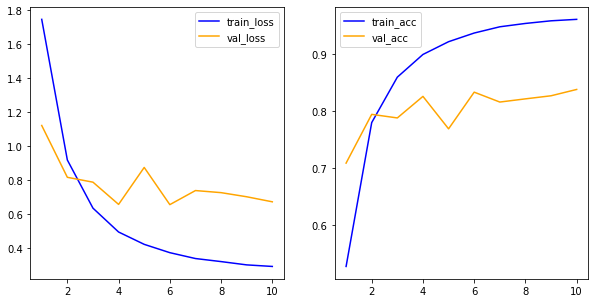

In [ ]:
hist_dict = history.history

import matplotlib.pyplot as plt
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
epochs = range(1,len(loss)+1) # len(val_loss) 써도됌

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.legend()

acc = hist_dict['acc']
val_acc= hist_dict['val_acc']
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.legend()

검증하기  

test : 18720개 ( 93600 * 0.2)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255) 
test_generator = test_datagen.flow_from_directory(test_dir,  # target directory
                                                    classes=class_names, # cats, dogs directory 순서로 label 0,1을 설정
                                                    target_size=(100,100),
                                                    batch_size= 32,
                                                    class_mode='categorical')
test_preds = model.predict(test_generator)

Found 18720 images belonging to 18 classes.
585/585 [==============================] - 138s 236ms/step


In [ ]:
np.argmax(test_preds[0])

9

In [ ]:
class_names_hangul = ['보통_무표정','보통_활짝웃음','보통_찡그림',
                      '일반안경_무표정','일반안경_활짝웃음','일반안경_찡그림',
                      '뿔테안경_무표정','뿔테안경_활짝웃음','뿔테안경_무표정_찡그림',
                      '선글라스_무표정','선글라스_활짝웃음','선글라스_찡그림',
                      '모자_무표정','모자_활짝웃음','모자_찡그림',
                      '모자+뿔테_무표정','모자+뿔테_활짝웃음','모자+뿔테_찡그림',
                      ]

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

(32, 100, 100, 3) (32, 18)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
11
14
17
1
10
8
14
15
15
16
8
9
17
15
16
10
4
3
7
9
2
7
4
9


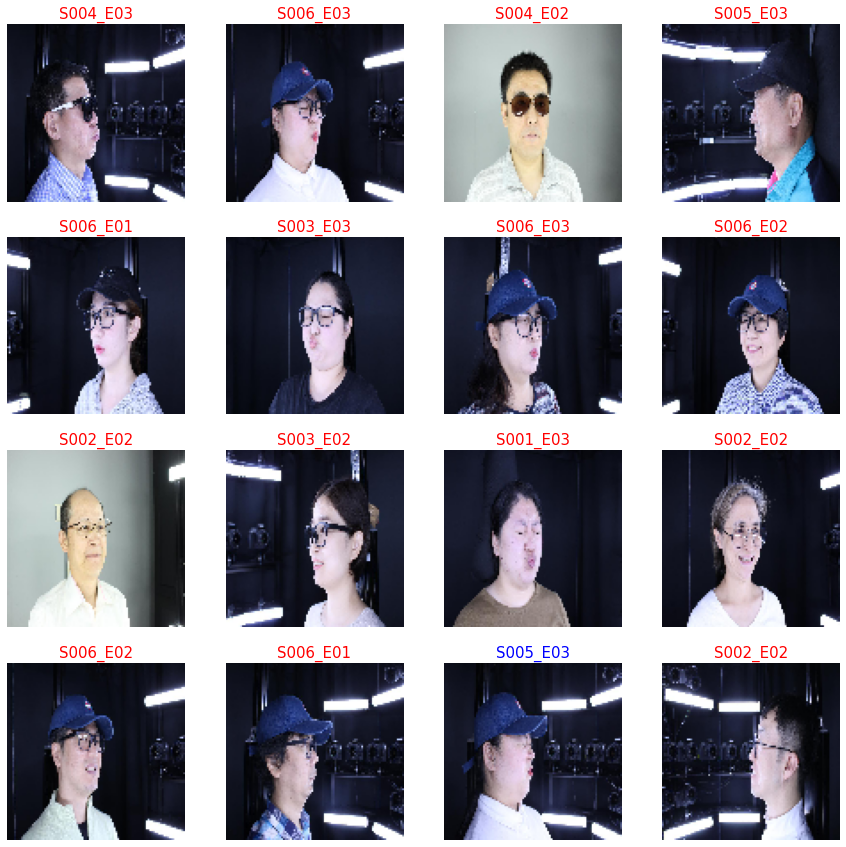

In [ ]:
from types import FunctionType
# https://teddylee777.github.io/tensorflow/cnn-image-classification

# for i in range(9):
#   np.random.randint(18721,9)

for imgs,labels  in test_generator: # test_generator 총 18720개 
  print(imgs.shape, labels.shape)
  print(labels[:16])

  plt.rc('font', family='NanumBarunGothic')
  
  fig, axes = plt.subplots(4, 4)
  fig.set_size_inches(15,15)
  for i in range(16):
      axes[i//4, i%4].imshow(imgs[i])
      print(np.argmax(labels[i]))
      print(np.argmax(test_preds[i]))
      if np.argmax(labels[i]) == np.argmax(test_preds[i]):
        axes[i//4, i%4].set_title(class_names[np.argmax(labels[i])], fontsize=15,color='blue')
      else:
        axes[i//4, i%4].set_title(class_names[np.argmax(labels[i])], fontsize=15,color='red')
      axes[i//4, i%4].axis('off')
  plt.show()
  break

In [ ]:
print(test_generator.class_indices)

{'S001_E01': 0, 'S001_E02': 1, 'S001_E03': 2, 'S002_E01': 3, 'S002_E02': 4, 'S002_E03': 5, 'S003_E01': 6, 'S003_E02': 7, 'S003_E03': 8, 'S004_E01': 9, 'S004_E02': 10, 'S004_E03': 11, 'S005_E01': 12, 'S005_E02': 13, 'S005_E03': 14, 'S006_E01': 15, 'S006_E02': 16, 'S006_E03': 17}


In [ ]:
test_predict = np.argmax(test_preds,axis=1)
len(test_predict), test_predict

(18720, array([14,  1,  8, ...,  9, 10, 10]))

In [ ]:
test_loss,test_acc = model.evaluate_generator(test_generator)
print(f"정확도: {np.round(test_acc,2)*100}%")

<ipython-input-39-596375c7876f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss,test_acc = model.evaluate_generator(test_generator)


정확도: 82.0%


In [ ]:
# Label 얻기
labels = test_generator.classes
len(labels) , labels

(18720, array([ 0,  0,  0, ..., 17, 17, 17], dtype=int32))

In [ ]:
test_acc

0.8243589997291565

In [ ]:
test_loss

0.7293699979782104

In [ ]:
# class_names => [S001_E01....S006_E03]

# np.random.seed(0)
# test_samples_idx = []

# for i in range(9):
#  np.random.randint(18721,9)


#Visual Model 추가  


In [ ]:
get_layer_name = [layer.name for layer in model.layers] # model.layers : 모델의 레이어들 리턴
get_layer_name # 레이어 이름을 알아야 특정 레이어 호출이 가능함

['conv2d',
 'batch_normalization',
 'activation',
 'conv2d_1',
 'batch_normalization_1',
 'activation_1',
 'max_pooling2d',
 'conv2d_2',
 'batch_normalization_2',
 'activation_2',
 'conv2d_3',
 'batch_normalization_3',
 'activation_3',
 'max_pooling2d_1',
 'flatten',
 'dense',
 'batch_normalization_4',
 'activation_4',
 'dense_1']

In [ ]:
get_output = [layer.output for layer in model.layers] # layer.output : 레이어 통과해서 나가는 것들
get_output

[<KerasTensor: shape=(None, 100, 100, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 100, 100, 32) dtype=float32 (created by layer 'batch_normalization')>,
 <KerasTensor: shape=(None, 100, 100, 32) dtype=float32 (created by layer 'activation')>,
 <KerasTensor: shape=(None, 100, 100, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 100, 100, 32) dtype=float32 (created by layer 'batch_normalization_1')>,
 <KerasTensor: shape=(None, 100, 100, 32) dtype=float32 (created by layer 'activation_1')>,
 <KerasTensor: shape=(None, 50, 50, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 50, 50, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 50, 50, 64) dtype=float32 (created by layer 'batch_normalization_2')>,
 <KerasTensor: shape=(None, 50, 50, 64) dtype=float32 (created by layer 'activation_2')>,
 <KerasTensor: shape=(None, 50, 50, 64) dtype=float32 (created by layer 'conv2